In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skfuzzy import cmeans

Fuzzy Partition Coefficient (FPC): 0.8596


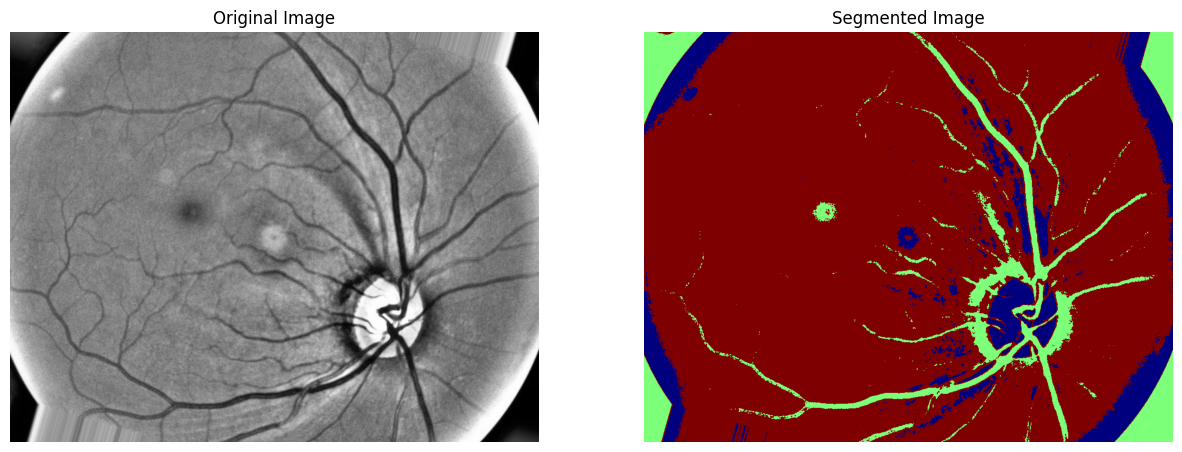

In [17]:
# Load the image
image_path = "DR1.jpeg"  # Replace with your image path
image = Image.open(image_path).convert("L")  # Convert to grayscale
gray_image = np.array(image, dtype=np.float64) / 255.0

# Reshape the image into a 1D array for clustering
pixel_values = gray_image.flatten().reshape(1, -1)

# Set FCM parameters
n_clusters = 3
m = 2.0  # Fuzziness parameter
error = 0.005
max_iter = 1000

# Run FCM
cntr, u, u0, d, jm, p, fpc = cmeans(
    pixel_values, n_clusters, m, error, max_iter, init=None, seed=42
)

# Get the cluster with the maximum membership
cluster_membership = np.argmax(u, axis=0)

# Reshape back to the original image shape
segmented_image = cluster_membership.reshape(gray_image.shape)

# Prepare data for scoring
pixel_values_for_score = pixel_values.flatten().reshape(-1, 1)

# Calculate Fuzzy Partition Coefficient (FPC)
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")

# Plot the original and segmented images
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image, cmap="jet")
plt.axis("off")

plt.show()


In [18]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [19]:
# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(pixel_values_for_score, cluster_membership)
print(f"Calinski-Harabasz Score: {ch_score:.4f}")

Calinski-Harabasz Score: 1364202.7529


In [20]:
# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(pixel_values_for_score, cluster_membership)
print(f"Davies-Bouldin Score: {db_score:.4f}")

Davies-Bouldin Score: 0.4776
